<a href="https://colab.research.google.com/github/dunguyen0102/ml_k46/blob/main/IRIS_GaussianMixtureModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Áp dụng phương pháp Gaussian Mixture Model cho dataset IRIS

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib as mpl
import matplotlib.pyplot as plt 
from pandas import DataFrame 
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture 
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import datasets
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.cluster import KMeans

# Load dataset
Dataset IRIS gồm 150 mẫu dữ liệu, 5 thuộc tính:
1. sepal length in cm
2. sepal width in cm
3. petal length in cm
4. petal width in cm
5. **class: (3 loại hoa)** Iris Setosa, Iris Versicolour, Iris Virginica


In [ ]:
dataset = datasets.load_iris()
X=dataset['data']
y=dataset['target']
column_values = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
X = pd.DataFrame(X, columns=column_values)
X.head(5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
X.shape

(150, 4)

In [ ]:
nclusters = 3 # The number of clusters
seed = 0

# Tiền xử lý dữ liệu

1.   Dữ liệu được scale bằng StandardScaler, sau đó normalize lại
2.   PCA được sử dụng để lấy ra 2 thành phần chính, PC1, PC2 phục vụ cho clustering

In [ ]:
# Standardize data
scaler = StandardScaler() 
scaled_df = scaler.fit_transform(X) 
  
# Normalizing the Data 
normalized_df = normalize(X) 
  
# Converting the numpy array into a pandas DataFrame 
normalized_df = pd.DataFrame(normalized_df) 
  
# Reducing the dimensions of the data 
pca = PCA(n_components = 2, random_state=seed) 
X_principal = pca.fit_transform(normalized_df) 
X_principal = pd.DataFrame(X_principal) 
X_principal.columns = ['PC1', 'PC2'] 
  
X_principal.head(2)

,PC1,PC2
0,0.301637,0.000716
1,0.270921,0.042354


In [ ]:
def plotData(df, groupby):
    "make a scatterplot of the first two principal components of the data, colored by the groupby field"
    
    fig, ax = plt.subplots(figsize = (7,7))

    # color map
    cmap = mpl.cm.get_cmap('prism')

 
    for i, cluster in df.groupby(groupby):
        cluster.plot(ax = ax, 
                     kind = 'scatter', 
                     x = 'PC1', y = 'PC2',
                     color = cmap(i/(nclusters-1)), 
                     label = "%s %i" % (groupby, i), 
                     s=30) 
    ax.grid()
    ax.axhline(0, color='black')
    ax.axvline(0, color='black')
    ax.set_title("Principal Components Analysis (PCA) of Iris Dataset");

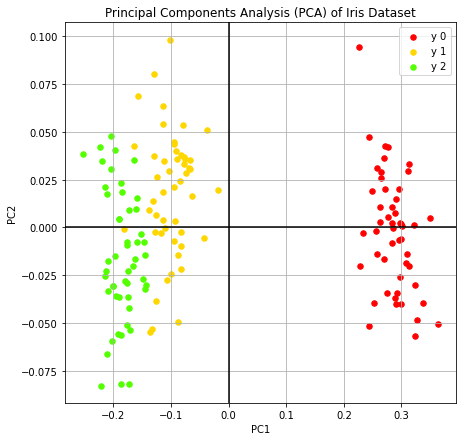

In [ ]:
data = X_principal.copy()
data['y'] = y
plotData(data, 'y')

# Gaussian Mixture Model

In [ ]:
gmm = GaussianMixture(n_components = nclusters) 
gmm.fit(X_principal)
y_cluster_gmm = gmm.predict(X_principal)

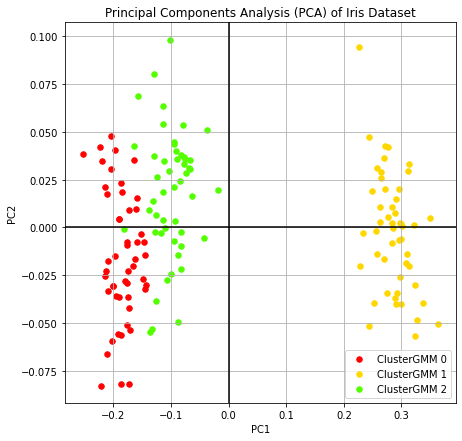

In [ ]:
X_principal['ClusterGMM'] = y_cluster_gmm
plotData(X_principal, 'ClusterGMM')

# Sử dụng *adjusted Rand score* để đánh giá kết quả clustering (so sánh với true labels)



In [ ]:
#Score theo phương pháp GMM
score = adjusted_rand_score(y, y_cluster_gmm)
score

1.0